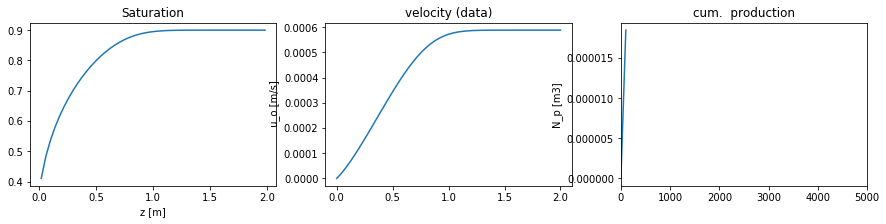

'\n##########################################################################\n# Data needed for computer practical: \n#\n# The (synthetic) data you will need for the computerlab \n# is the production data given by:\n#\n# t       : time\n# np_o    : production data at times t\n#\n# and (for comparison only) the saturation profile so(z)\n#\n# z       : vector with spatial z - positions\n# so_data : (synthetic) saturation profiles at time t=searchTime=500\n#\n# In addition you will need the parameters specifying your core  \n# i.e. permeability, core length, porosity\n# and necessary fluid parameters (density, viscosity) as specified in\n# the "user specified parameters" section\n#\n##########################################################################\n'

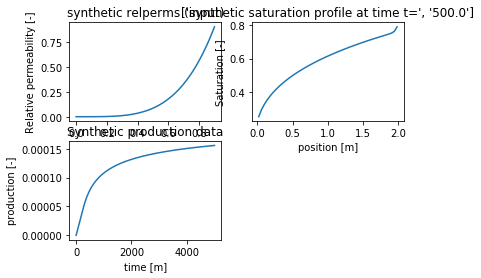

In [3]:

# 19/12/2019
# Compute the displacement of oil (and air) in a column at connate water
# driven by its own weight
#
# Equations:
# for air phase  : dpa/dz - rho_a*g ~ 0   (due to super high air mobility)
# such that :
# oil phase :      phi * dso/dt + mob_o * ( d2pc/dz2 + (rho_o-rho_a)*g ) = 0

####################################################################
# Instructions :
# This module generates synthetic data for the gravity drainage experiment
# by simulating the set-up including the presence of capillary forces.
#
# - For computer practical
#  - simply run this program to generate synthetic production data
#    and perform the exercises as given in the asignment.
#  - The data you need is given at the end of this program
#
# - For lab practical
#  - Adjust the parameters in the "USER specified parameter" section" such
#    that parameters match your physical set-up
#  - Export the excell data you got from the lab practical to some text or
#    data file and write a routine to import it in matlab
#    call these : t_data, np_data
#  - Use the same procedure as in the compulab to determine the analytic
#    saturation - relative permeability relationship under the assumption
#    that you can ignore pc . HOWEVER, replace the synthetic data used in
#    the compuLab by the real production data you just imported
#  - Realize that the real production data contains noise. To determine
#    derivatives you can use smoothed averages
#      df/dx  ~  (f(x+a) - (f(x-a)) / ( 2*a )
#    increasing (a) removes more noise but reduces the accuracy
#  - For comparison with simulations that include pc, manually adjust the
#    main fit parameter like the sorting factor (grav.lambda)
#    ( Improved fits may be obtained by also asjuting permeability,
#      residual saturation and porosity. Don't waste (too) much time to
#      obtain a perfect fit )
#    and re-run this module. This module generates synthetic data (based
#    on simulation that include pc) that you can compare to the real
#    production data
#
########################################################################

import numpy as np
from grav_drain_model import *
m = Model()
%matplotlib inline

# - computation of (synthetic) relative permeability - saturation relationship

so_syn = np.linspace(m.sor, 1 - m.swc, 100)     # saturation range
no = 2/m.lambdaa+3                      # Brooks corey coeff for oil relperm
soe = (so_syn - m.sor)/(1 - m.swc - m.sor) # Effective oil saturation
kro_syn = m.kroe*soe**no                   # Oil relative permeability

# Compute two phase flow including pc
compute_pc = 1       # parameter that specifies twther the capillary forces should be compute
m.run(compute_pc)    # the actual numerical simulation of the flow inside the column

# post processing data and plotting

z = m.z          # [1,nz] spatial co-ordinates of grid-block
nz = m.nz        # number of grid-blocks
zv = m.z         # [1,nz+1] spatial co-ordinate of cell-faces
t = m.t          # [1,nt] point in time at which production is determined
nt = len(t)      #  number of times the production is determined
np_o = m.np_o    # [1,nt] [(synthetic) production
t_A = m.t_A      # [nA,1] vector with time at which the saturation is sampled
nA = len(t_A)    # number of times the saturation is sampled
so_A = m.so_A    # [nz,nA] matrix with all saturation values
uo_A = m.so_A    # [nz+1,nA]

# plot of synthetic relative permeability - saturation relationship
plt.figure(2)
plt.subplot(2,2,1)
plt.plot(so_syn,kro_syn)
plt.xlabel('Saturation [-]')
plt.ylabel('Relative permeability [-]')
plt.title('synthetic relperms (input)')
#plt.show()
#  Determine the index to the time vector t_A
searchTime = 500
y = [(x - searchTime)**2 for x in t_A]
value = min(y)
index = y.index(min(y))
searchTime = t_A[index]
so_data = so_A[:,index]
plt.subplot(2,2,2)
plt.plot(z,so_data)
plt.xlabel('position [m]')
plt.ylabel('Saturation [-]')
plt.title(['synthetic saturation profile at time t=', str(searchTime)])
plt.subplot(2,2,3)
plt.plot(t,np_o)
plt.xlabel('time [m]')
plt.ylabel('production [-]')
plt.title('Synthetic production data')
#plt.show()

'''
##########################################################################
# Data needed for computer practical: 
#
# The (synthetic) data you will need for the computerlab 
# is the production data given by:
#
# t       : time
# np_o    : production data at times t
#
# and (for comparison only) the saturation profile so(z)
#
# z       : vector with spatial z - positions
# so_data : (synthetic) saturation profiles at time t=searchTime=500
#
# In addition you will need the parameters specifying your core  
# i.e. permeability, core length, porosity
# and necessary fluid parameters (density, viscosity) as specified in
# the "user specified parameters" section
#
##########################################################################
'''

## start answering exercises here

